## Python Advance Programming A24
### 1. Implement a class iterator to flatten a nested list of lists of integers. Each list element is either an integer or a list. There can be many levels of nested lists in lists.
The class initializes with a nested list. It also has two methods: <br>
1. next() returns an integer in the order of appearance. <br>
2. hasNext() returns True / False regarding if all integers have been retrieved or not. <br>
Write the Class implementation for three required methods. <br>
Examples <br>
ni, actual = NestedIterator([[1, 1], 2, [1, 1]]), [] <br>
while ni.hasNext(): <br>
&ensp;    actual.append(ni.next()) <br>
actual ➞ [1, 1, 2, 1, 1] <br>
ni, actual = NestedIterator([1, [4, [6]]]), [] <br>
while ni.hasNext(): <br>
  &ensp;   actual.append(ni.next()) <br>
actual ➞ [1, 4, 6] <br>
ni, actual = NestedIterator([[[]], []]), [] <br>
while ni.hasNext(): <br>
 &ensp;    actual.append(ni.next()) <br>
actual ➞ [] <br>
#### Answer :

In [8]:
class NestedIterator:
    Next=0
    def __init__(self,list1):
        self.list1 =list1
        list2=[]
        for i in self.list1:
            if type(i)==list:
                for j in i :
                    if type(j)==list:
                        for k in j :
                            if type(k)==list:
                                for d in k:
                                    list2.append(d)
                            else:
                                list2.append(k)
                    else:
                        list2.append(j)
            else:
                list2.append(i)     
        self.list2=list2
        
    def next(self):
        list3 =self.list2[self.__class__.Next]
        self.list2.pop(0)
        return list3
    
    def hasNext(self):
        if len(self.list2) == 0:
            return False
        else :
            return True
    
ni, actual = NestedIterator([[1, 1], 2, [1, 1]]), []
while ni.hasNext():
    actual.append(ni.next())
print(actual)

ni, actual = NestedIterator([1, [4, [6]]]), []
while ni.hasNext():
    actual.append(ni.next())
print(actual)

ni, actual = NestedIterator([[[]], []]), []
while ni.hasNext():
    actual.append(ni.next())
print(actual)

[1, 1, 2, 1, 1]
[1, 4, 6]
[]


### 2. Implement the class Shape that receives perimeter and density function into __init__ method. The list of consecutive corners defines shape of a 2-dimensional object. The density function defines the mass distribution inside the shape. To compute mass in a certain point m(x, y) = small_square * density(x, y). The __init__ method calls other internal methods that compute three characteristics of the shape:
- area <br>
- total mass <br>
- center of mass (xc, yc) <br>
The computational grid has distance between two neighboring points as 2 * delta, the distance between a grid point and the perimeter wall is delta. <br>
Examples <br>
sh_ex1 = Shape([(1, 1), (3, 1), (3, 2), (1, 2)], lambda x, y: 100 + 100 * x) <br>
sh_ex1.area ➞ 2.0 <br>
sh_ex1.mass ➞ 600.0 <br>
sh_ex1.mass_center ➞ (2.1, 1.5) <br>
The example can be verified via analytical integration. Other shapes in Tests are slightly more complicated and require numerical integration as illustrated here: <br>
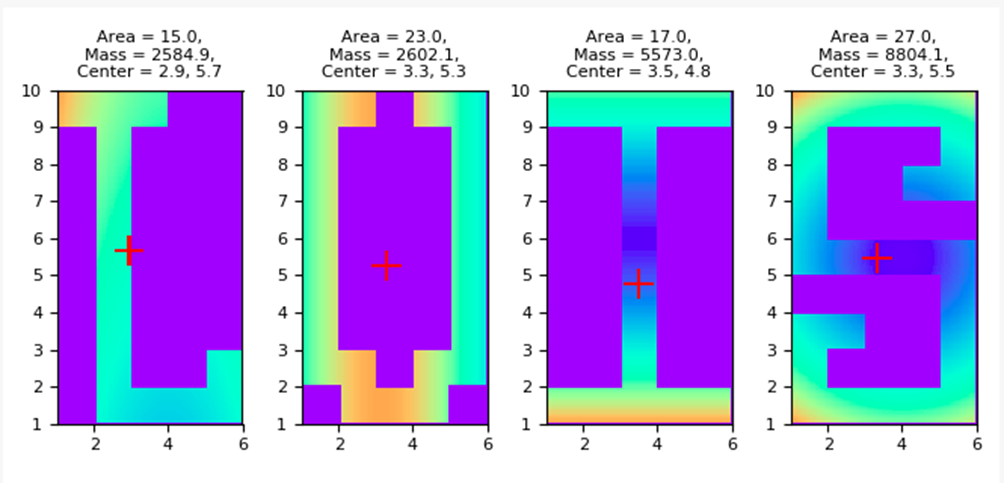 <br>
#### Answer :

In [4]:
from scipy import integrate
class Shape:
    def __init__(self,arr,density):
        self.x=[i[0] for i in arr]
        self.y=[i[1] for i in arr]
        self.density=density
        self.area=self.total_area()
        self.mass=self.total_mass()
        self.mass_center=self.center()
        
    def total_area(self):
        area = 0.0
        for i in range(-1, len(self.x)-1):
            area += self.x[i] * (self.y[i+1] - self.y[i-1])
        return abs(area) / 2.0
    
    def total_mass(self):
        res=integrate.dblquad(self.density, min(self.y), max(self.y), lambda x: min(self.x), lambda x: max(self.x))
        return res[0]
    #by using scipy.integrate.dblquad() method, we can get the double integration of a given function from limit x to y
    
    def center(self):
        f1=lambda x, y : self.density(x, y) * x
        com_x,_=integrate.dblquad(f1, min(self.y), max(self.y), lambda x: min(self.x), lambda x: max(self.x))
        f1=lambda x, y : self.density(x, y) * y
        com_y,_=integrate.dblquad(f1, min(self.y), max(self.y), lambda x: min(self.x), lambda x: max(self.x))   
        return (round(com_x/self.total_mass(),1),round(com_y/self.total_mass(),1))
           
sh_ex1 = Shape([(1, 1), (3, 1), (3, 2), (1, 2)], lambda x, y: 100 + 100 * x)
print(sh_ex1.area)
print(sh_ex1.mass)
print(sh_ex1.mass_center)  

2.0
600.0
(2.1, 1.5)


### 3. Given a 3x3 matrix of a completed tic-tac-toe game, create a function that returns whether the game is a win for "X", "O", or a "Draw", where "X" and "O" represent themselves on the matrix, and "E" represents an empty spot.
Examples <br>
tic_tac_toe([ <br>
&nbsp;  ["X", "O", "X"], <br>
&nbsp;  ["O", "X",  "O"], <br>
&nbsp;  ["O", "X",  "X"] <br>
]) ➞ "X" <br>
tic_tac_toe([ <br>
&nbsp;  ["O", "O", "O"], <br>
&nbsp;  ["O", "X", "X"], <br>
 &nbsp; ["E", "X", "X"] <br> <br>
]) ➞ "O" <br>
tic_tac_toe([ <br>
&nbsp;  ["X", "X", "O"], <br>
&nbsp;  ["O", "O", "X"], <br>
&nbsp;  ["X", "X", "O"] <br>
]) ➞ "Draw" <br>
#### Answer :

In [8]:
def tic_tac_toe(list1):
    output = None  
    
    for i in list1:
        if len(list(set(i))) == 1:
            output = list(set(i))[0]
            break

    if output == None:
        for i in range(len(list1)):
            list2 = []
            for j in range(len(list1)): list2.append(list1[j][i])
            if len(list(set(list2))) == 1: output = list(set(list2))[0]
    
    if output == None:
        list3 = []
        for i in [0,1,2]:
            list3.append(list1[i][i])
        if len(list(set(list3))) == 1: output = list(set(list3))[0]
    
    if output == None:
        list4 = []
        for i in [0,1,2]:
            for j in [0,1,2]:
                if sum([i,j]) == 2: list4.append(list1[i][j])
        if len(list(set(list4))) == 1: output = list(set(list4))[0]
    
    if output == None: output = 'Draw'
    print(output)
            
tic_tac_toe([["X", "O", "X"],["O", "X", "O"],["O", "X", "X"]])
tic_tac_toe([["O", "O", "O"],["O","X", "X"],["E", "X", "X"]])
tic_tac_toe([["X", "X", "O"],["O", "O", "X"],["X", "X", "O"]])

X
O
Draw


### 4. Your computer might have been infected by a virus! Create a function that finds the viruses in files and removes them from your computer.
Examples <br>
remove_virus("PC Files: spotifysetup.exe, virus.exe, dog.jpg") ➞ "PC Files: spotifysetup.exe, dog.jpg"
remove_virus("PC Files: antivirus.exe, cat.pdf, lethalmalware.exe, dangerousvirus.exe ") ➞ "PC Files: antivirus.exe, cat.pdf" <br>
remove_virus("PC Files: notvirus.exe, funnycat.gif") ➞ "PC Files: notvirus.exe, funnycat.gif")
#### Answer :

In [9]:
import re
def remove_virus(string1):
    in_list = [x.strip() for x in re.split(", ",string1)]
    output = []
    for ele in in_list:
        if ele not in ['virus.exe','dangerousvirus.exe','lethalmalware.exe']:
            output.append(ele)
    print(output)
    
remove_virus("PC Files: spotifysetup.exe, virus.exe, dog.jpg")
remove_virus("PC Files: antivirus.exe, cat.pdf, lethalmalware.exe, dangerousvirus.exe ")
remove_virus("PC Files: notvirus.exe, funnycat.gif")

['PC Files: spotifysetup.exe', 'dog.jpg']
['PC Files: antivirus.exe', 'cat.pdf']
['PC Files: notvirus.exe', 'funnycat.gif']


### 5. In a video game, a meteor will fall toward the main character's home planet. Given the meteor's trajectory as a string in the form y = mx + b and the character's position as a tuple of (x, y), return True if the meteor will hit the character and False if it will not.
Examples <br>
will_hit("y = 2x - 5", (0, 0)) ➞ False <br>
will_hit("y = -4x + 6", (1, 2)) ➞ True <br>
will_hit("y = 2x + 6", (3, 2)) ➞ False <br>
#### Answer :

In [6]:
def will_hit(equation, coord):
    equation = equation[4:].replace('x','*x')
    x, y = coord
    return y == eval(equation)
    
print(will_hit("y = 2x - 5", (0, 0)))
print(will_hit("y = -4x + 6", (1, 2)))
print(will_hit("y = 2x + 6", (3, 2)))

False
True
False
